In [2]:
import pandas as pd
import numpy as np

In [ ]:
articles = pd.read_csv("../process_articles/validated_articles.csv")

In [9]:
print(len(articles))
articles.head(1)

2014


,authors,title,date,year,edition,url,text,quarter,year_quarter
0,NaN,本期导读,2023-01-01,2023,1.0,http://www.qstheory.cn/dukan/qs/2023-01/01/c_1...,本期发表了习近平总书记的重要讲话《为实现党的二十大确定的目标任务而团结奋斗》。讲话强调，全面...,1,2023 Q1


In [20]:
# set up matplotlib to use Chinese text
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt

fpath = Path(mpl.get_data_path(), "fonts/ttf/NotoSansSC-Regular.ttf")
    
def get_empty_results_dict(df):
    sentiment_by_quarter = {}

    for quarter in df["year_quarter"].unique():
        sentiment_by_quarter[quarter] = 0
        
    return sentiment_by_quarter

def quarter_count(articles_df, search_term):
    term_quarter_count = get_empty_results_dict(articles_df)

    for index, row in articles_df.iterrows():
        year_quarter = row["year_quarter"]
        try: 
            quarter_count = term_quarter_count[year_quarter]
            count = row['text'].count(search_term)
            quarter_count += count
            term_quarter_count[year_quarter] = quarter_count
        except:
            pass

    # sort the years
    term_quarter_count = {k: v for k, v in sorted(term_quarter_count.items(), key=lambda item: item[0])}

    return term_quarter_count

def plot_quarter_counts(df, term, translation, title=None, fig_size=None):
    # get the data
    term_quarter_count = quarter_count(df, term)
    xvalues = list(term_quarter_count.keys())
    yvalues = list(term_quarter_count.values())

    # plot
    if fig_size is not None:
        fig, ax = plt.subplots(figsize=fig_size)
    else:
        fig, ax = plt.subplots()

    ax.plot(xvalues, yvalues)
    ax.set_title(title, font=fpath)
    ax.set_xlabel('Quarter')
    ax.set_ylabel(f"\"{term}\" Instance Count", font=fpath)

    ax.tick_params(axis='x', rotation=50)
    ax.grid()

    plt.savefig(f"../visuals/{term}_frequency.png", bbox_inches="tight")

    plt.show()

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'
font = font_manager.FontProperties(fname=path)

def plot_multiple_quarter_counts(articles_df, nested_terms, y_lim=None, fig_size=None, title="Use of Select Terms in Qiushi"):
    """Input should be a df of the articles, and a nested list of the form [[term1, translation1], [term2, translation2]]"""

    if fig_size is not None:
        fig, ax = plt.subplots(figsize=fig_size)
    else:
        fig, ax = plt.subplots()

    save_string = ""

    for term_pair in nested_terms:
        term = term_pair[0]
        save_string += term + "_"
        term_quarter_count = quarter_count(articles_df, term)
        xvals = list(term_quarter_count.keys())
        yvals = list(term_quarter_count.values())

        label = " ".join(term_pair)

        ax.plot(xvals, yvals, label=label)

    if fig_size is not None:
        plt.figure(figsize=fig_size)

    ax.set_xlabel("Quarter")
    ax.set_ylabel("Instance Counts")
    if y_lim:
        ax.set_ylim(y_lim)
    ax.set_title(title)
    ax.legend(prop=font)
    ax.tick_params(axis='x', rotation=50)
    ax.grid()

    plt.savefig(f"../visuals/{save_string}frequency.png", bbox_inches='tight')
    plt.show()

def store_count_results(term, term_quarter_count):
    df = pd.DataFrame(columns=["year_quarter", "count"])
    for quarter in term_quarter_count.keys():
        df.loc[len(df)] = [quarter, term_quarter_count[quarter]]

    filename = term + "_quarter_counts.csv"

    df.to_csv(f"./frequency_counts/{filename}", index=False)
        

In [4]:
store_count_results("经济", quarter_count(articles, "经济"))

NameError: name 'articles' is not defined

In [12]:
econ_counts = quarter_count(articles, "经济")

sum(econ_counts.values()) / len(econ_counts)

763.15

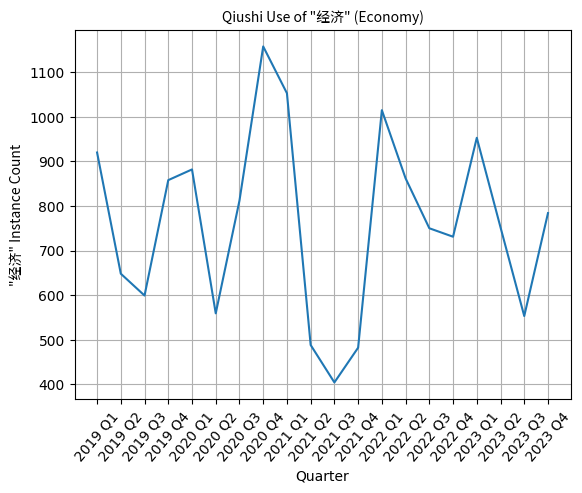

In [13]:
plot_quarter_counts(articles, "经济", "Economy")

In [14]:
store_count_results("美国", quarter_count(articles, "美国"))

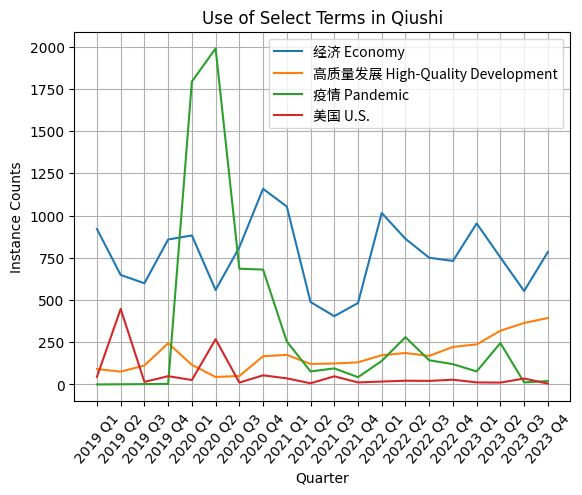

In [15]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"], ["美国", "U.S."]])

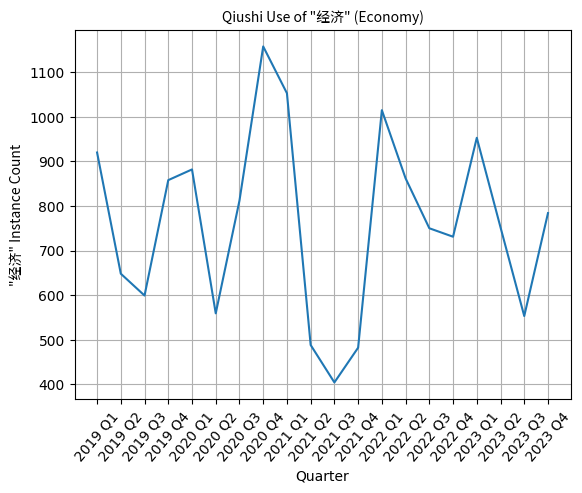

In [16]:
plot_quarter_counts(articles, "经济", "Economy")

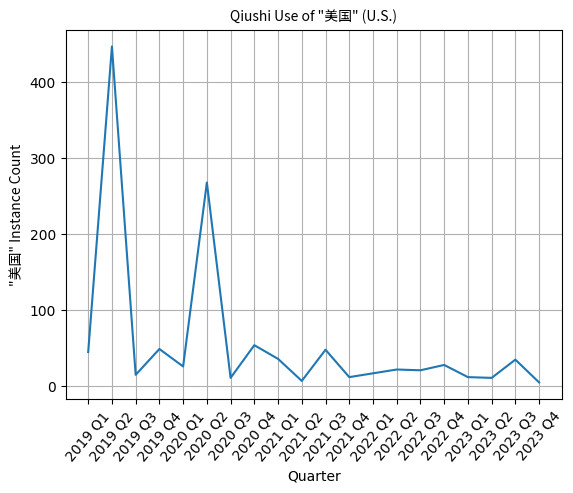

In [17]:
plot_quarter_counts(articles, "美国", "U.S.")

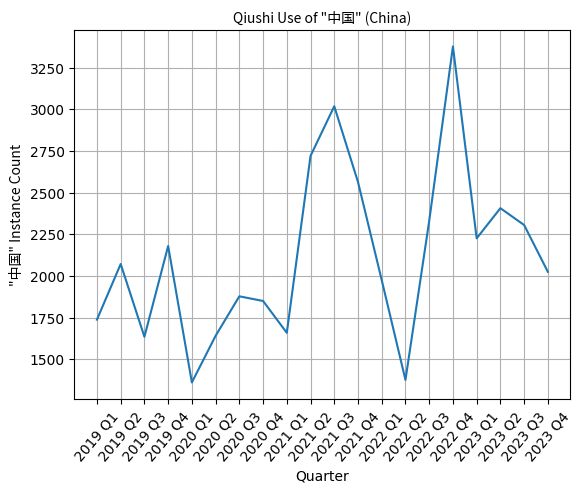

In [18]:
plot_quarter_counts(articles, "中国", "China")

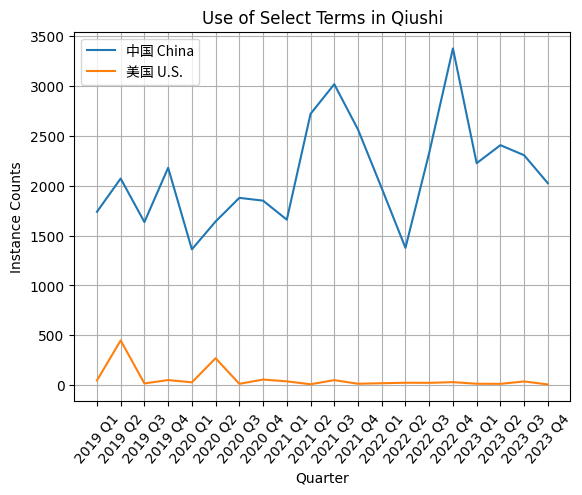

In [19]:
plot_multiple_quarter_counts(articles, [["中国", "China"], ["美国", "U.S."]])

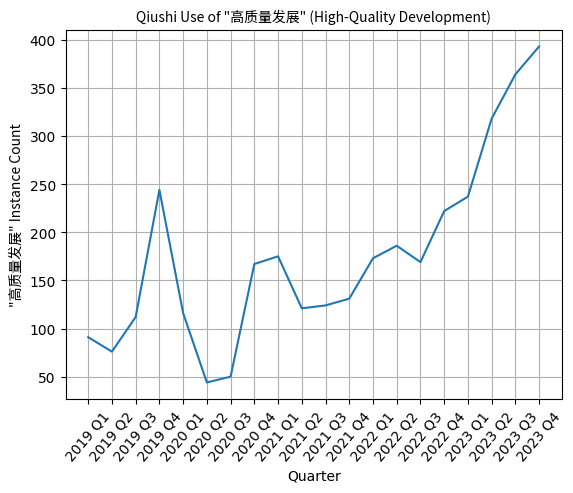

In [20]:
plot_quarter_counts(articles, "高质量发展", "High-Quality Development")

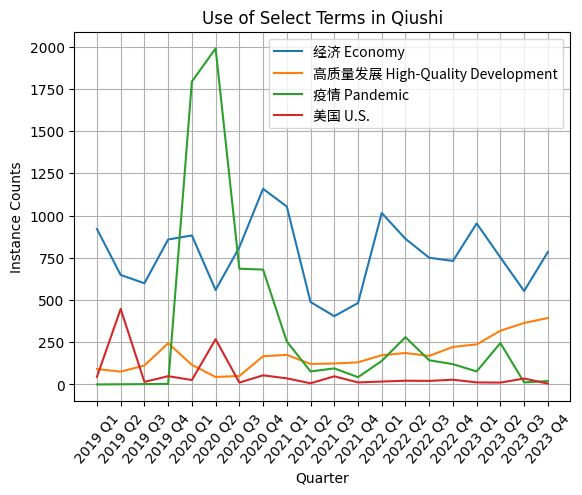

In [21]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"], ["美国", "U.S."]])

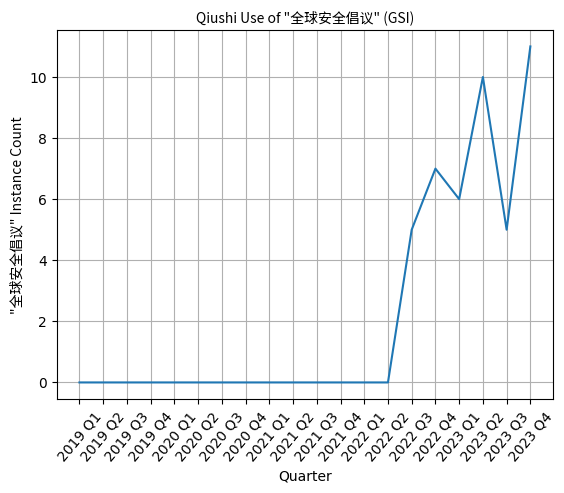

In [22]:
plot_quarter_counts(articles, "全球安全倡议", "GSI")

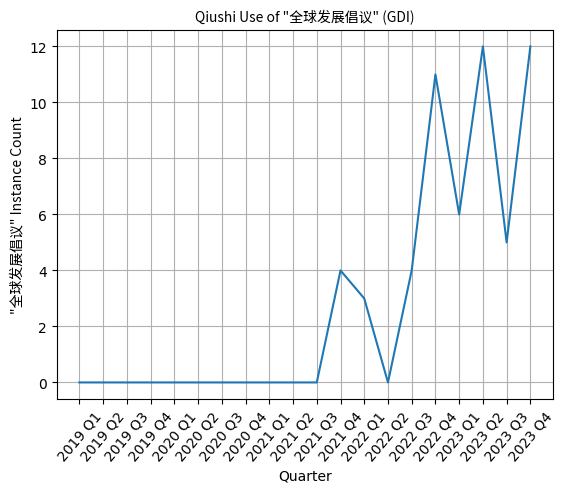

In [23]:
plot_quarter_counts(articles, "全球发展倡议", "GDI")

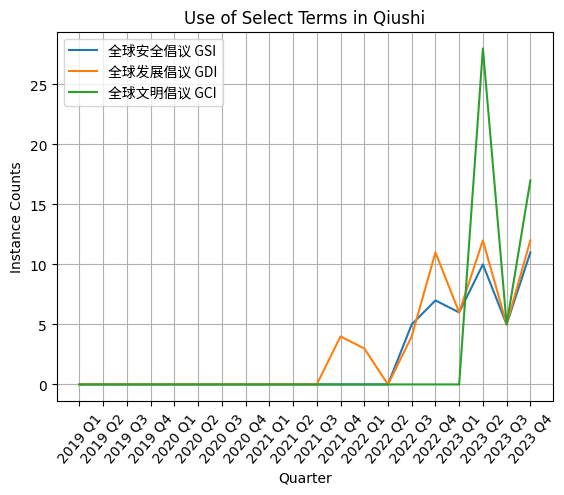

In [24]:
plot_multiple_quarter_counts(articles, [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"]])

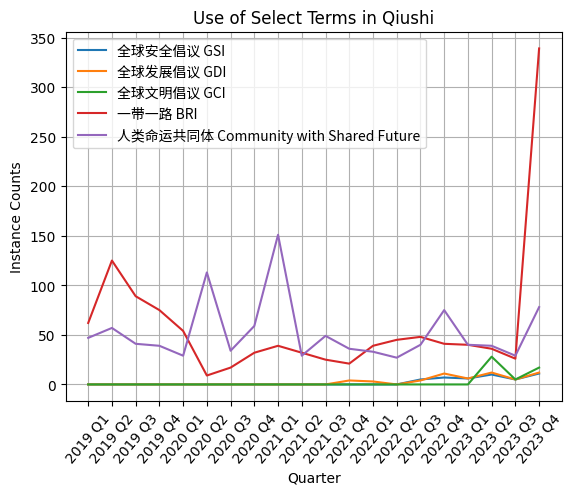

In [25]:
plot_multiple_quarter_counts(articles, [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"],["一带一路", "BRI"], ["人类命运共同体", "Community with Shared Future"]])

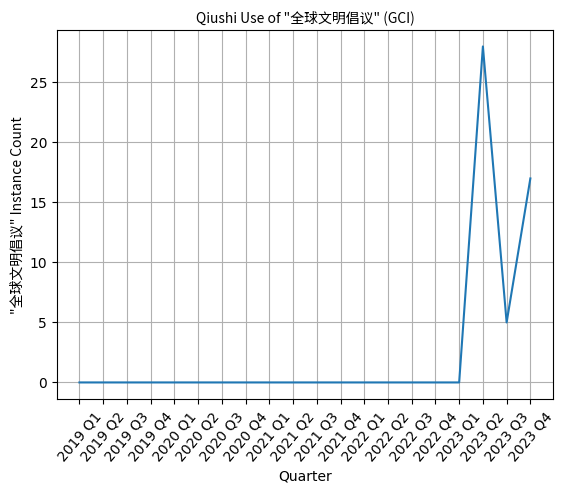

In [26]:
plot_quarter_counts(articles, "全球文明倡议", "GCI")

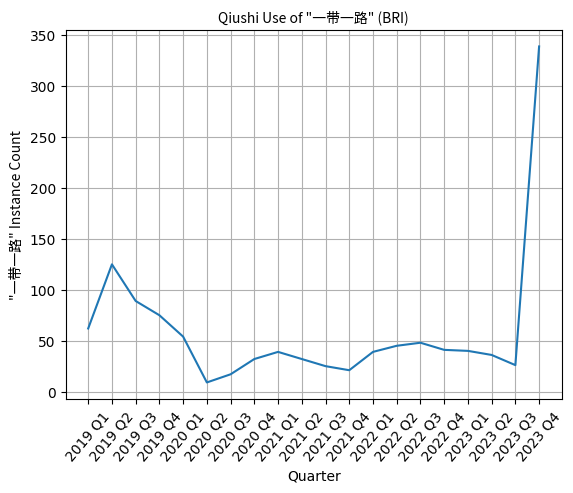

In [27]:
plot_quarter_counts(articles, "一带一路", "BRI")

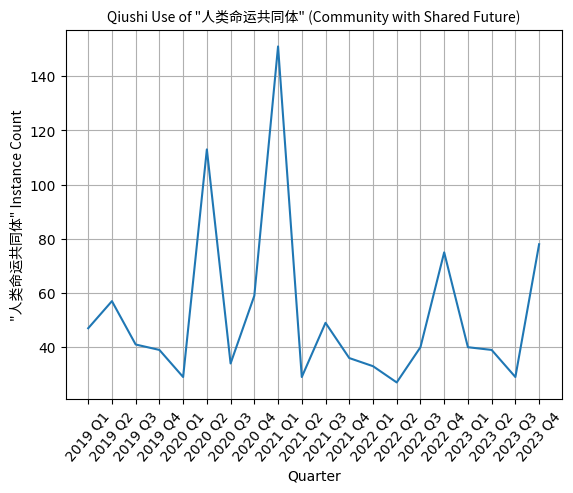

In [28]:
plot_quarter_counts(articles, "人类命运共同体", "Community with Shared Future")

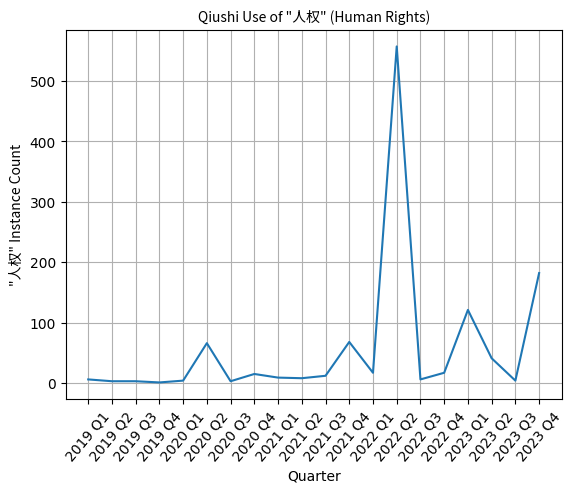

In [29]:
plot_quarter_counts(articles, "人权", "Human Rights")

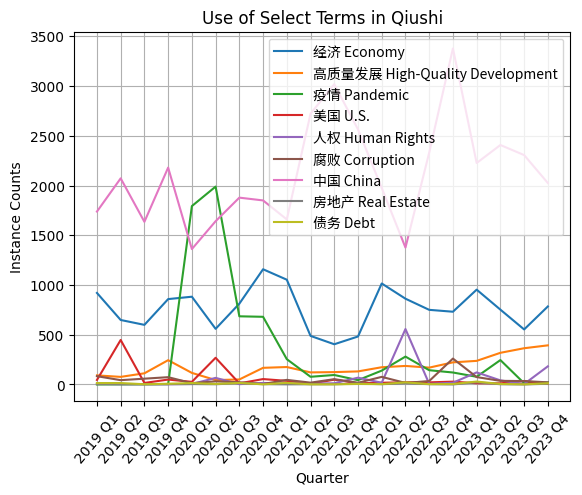

In [30]:
plot_multiple_quarter_counts(articles, [["经济", "Economy"],["高质量发展", "High-Quality Development"],["疫情", "Pandemic"], ["美国", "U.S."], ["人权", "Human Rights"], ["腐败", "Corruption"], ["中国", "China"], ["房地产", "Real Estate"], ["债务", "Debt"]])

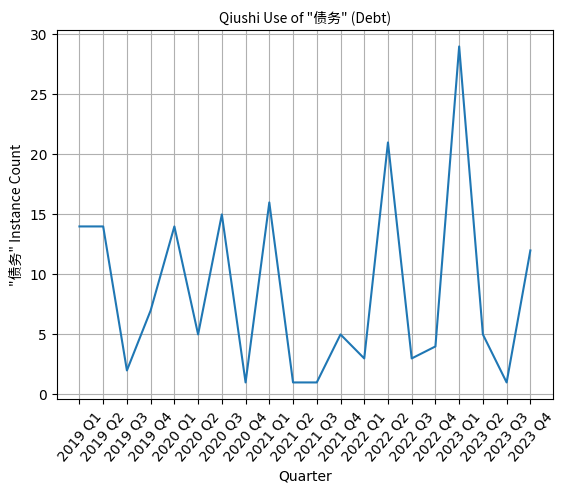

In [31]:
plot_quarter_counts(articles, "债务", "Debt")

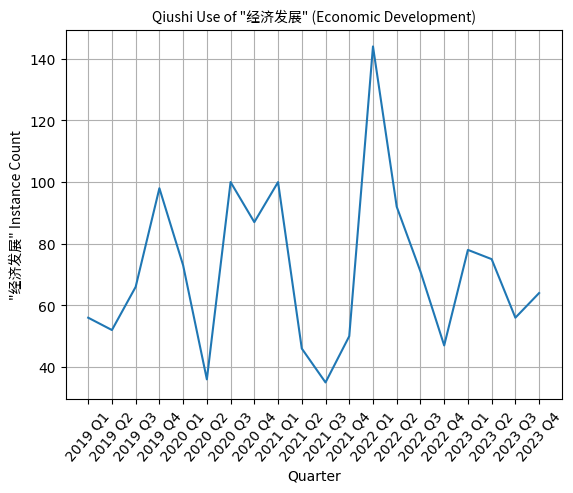

In [32]:
plot_quarter_counts(articles, "经济发展", "Economic Development")

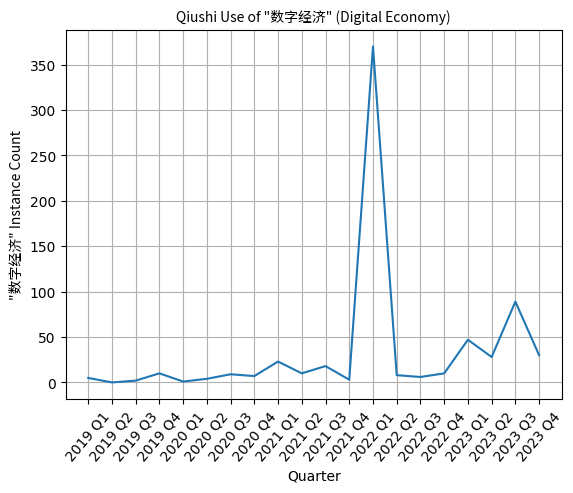

In [33]:
plot_quarter_counts(articles, "数字经济", "Digital Economy")

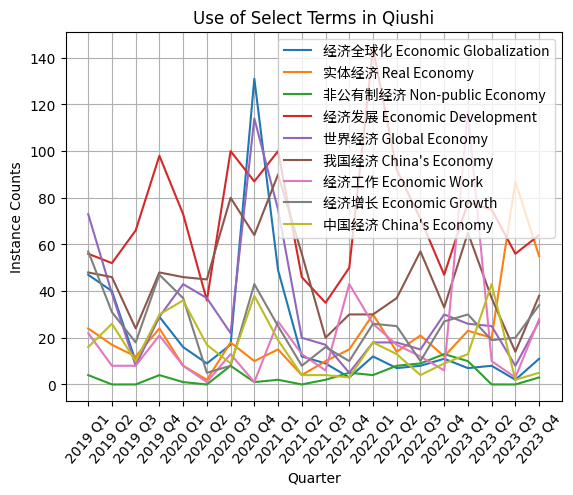

In [34]:
# pairs that were in the top two pairs for at least one quarter

plot_multiple_quarter_counts(articles, [['经济全球化','Economic Globalization'], ['实体经济','Real Economy'], ['非公有制经济','Non-public Economy'], ['经济发展','Economic Development'], ['世界经济','Global Economy'], ['我国经济','China\'s Economy'], ['经济工作', "Economic Work"], ['经济增长','Economic Growth'],  ['中国经济','China\'s Economy']])

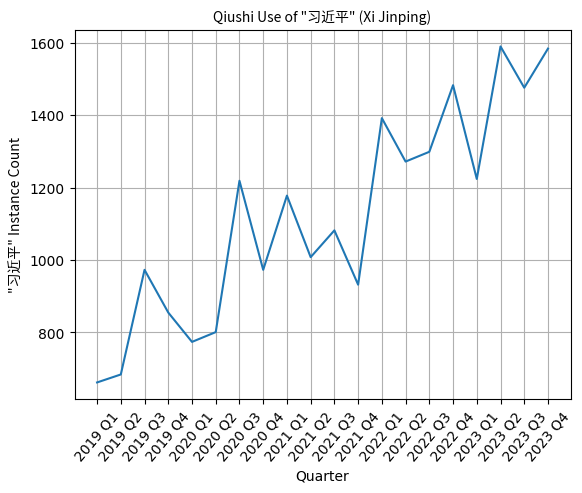

In [35]:
plot_quarter_counts(articles, "习近平", 'Xi Jinping')

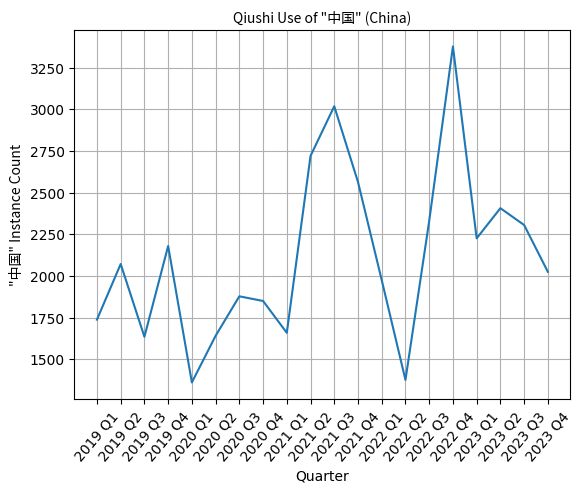

In [36]:
plot_quarter_counts(articles, "中国", 'China')


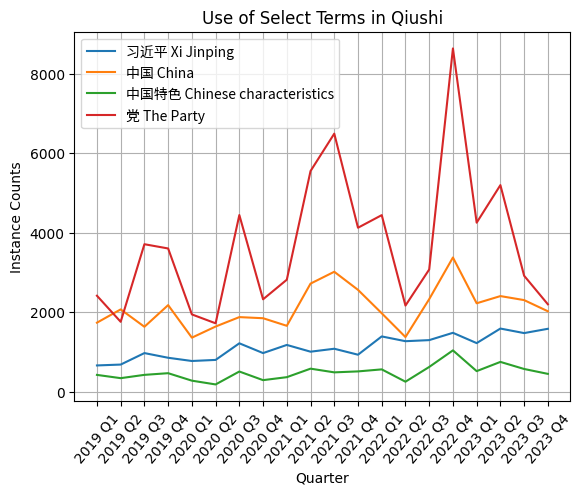

In [37]:
plot_multiple_quarter_counts(articles, [["习近平", 'Xi Jinping'],["中国", 'China'],["中国特色", 'Chinese characteristics'],["党", 'The Party']])

In [8]:
asx_articles = pd.read_csv('../process_asx_articles/processed_asx_articles.csv')

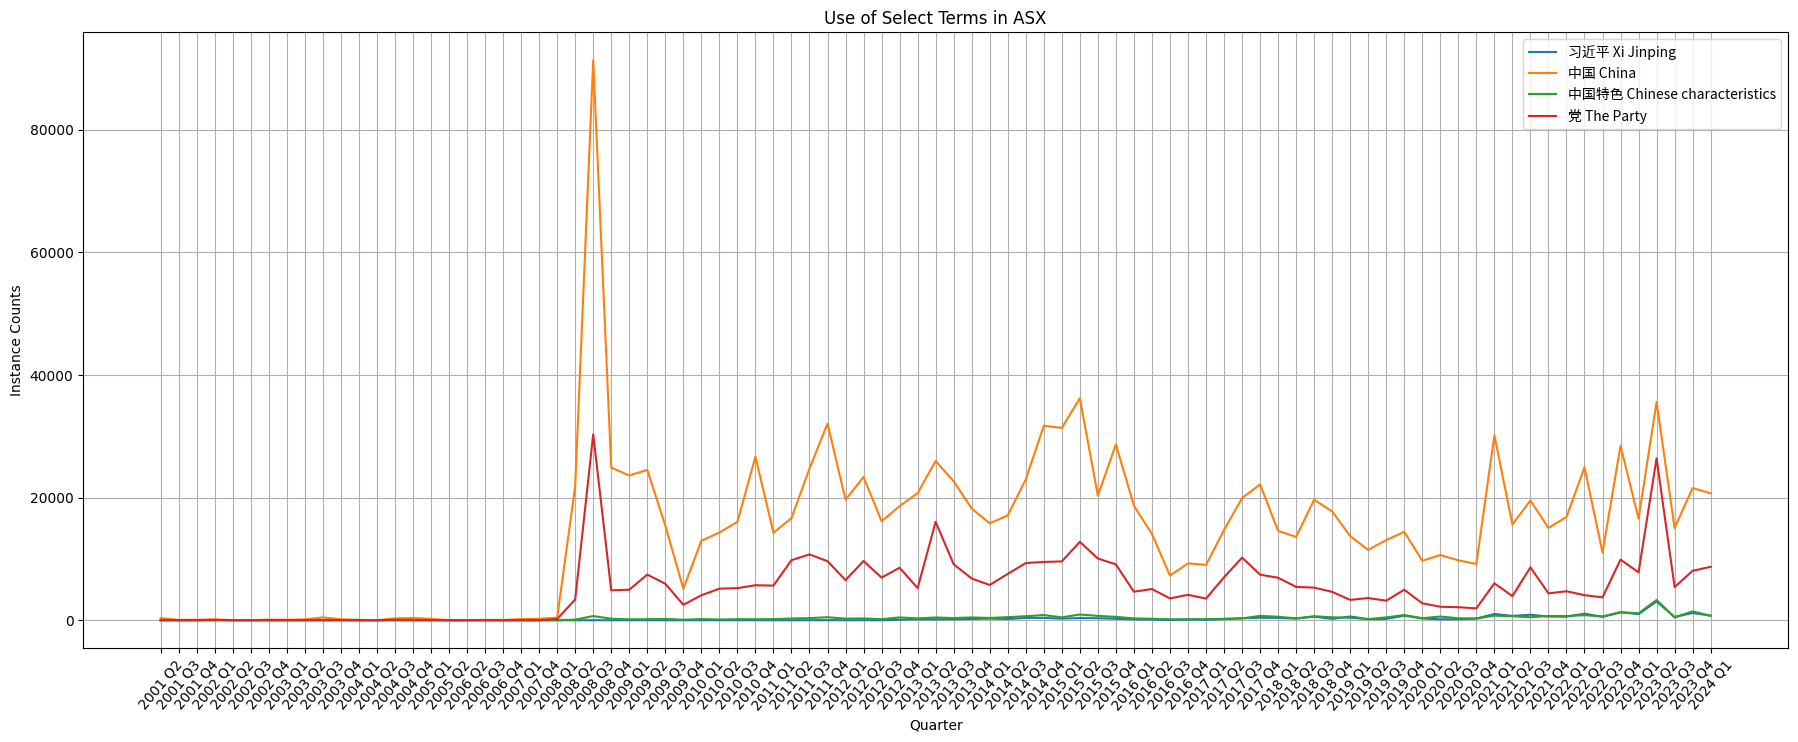

<Figure size 2200x800 with 0 Axes>

In [19]:
plot_multiple_quarter_counts(asx_articles, 
                            [["习近平", 'Xi Jinping'],["中国", 'China'],["中国特色", 'Chinese characteristics'],["党", 'The Party']], 
                            title="Use of Select Terms in ASX",
                            fig_size=(22, 8))

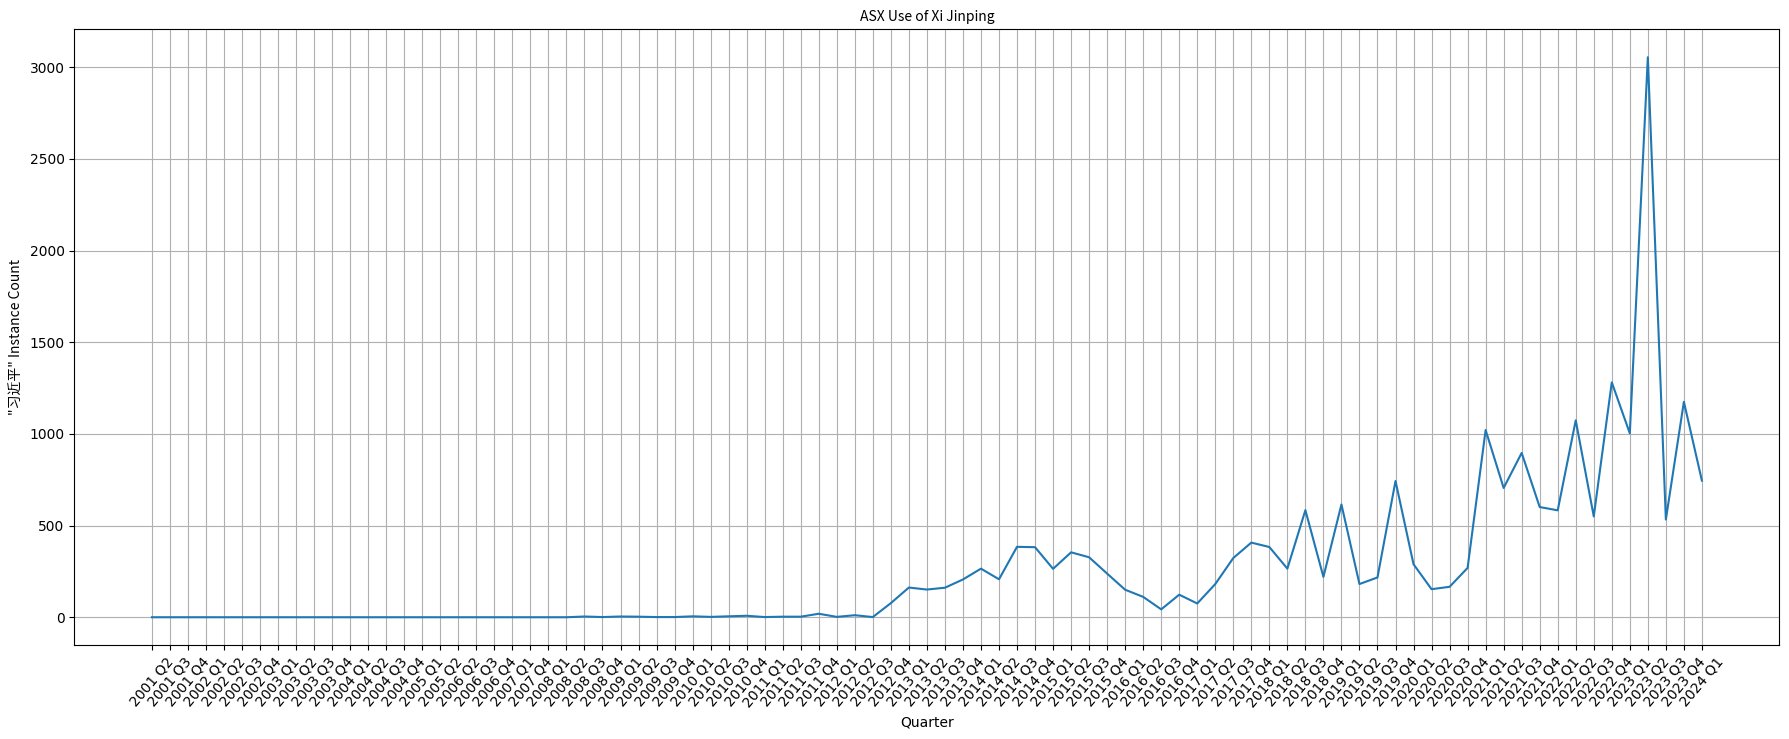

In [21]:
plot_quarter_counts(asx_articles, "习近平", 'Xi Jinping', title="ASX Use of Xi Jinping", fig_size=(22,8))

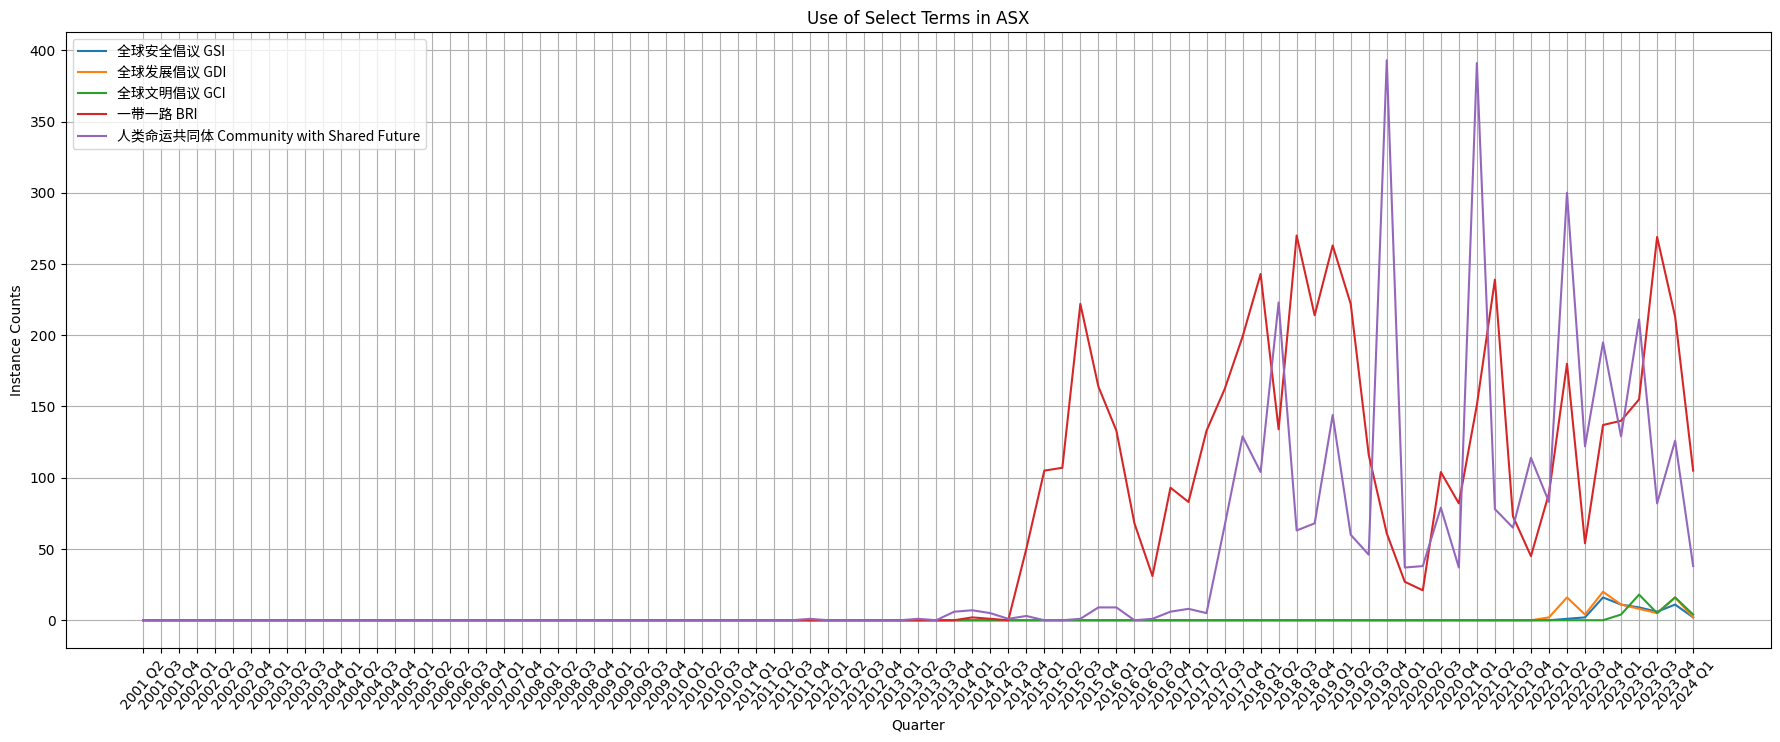

<Figure size 2200x800 with 0 Axes>

In [22]:
plot_multiple_quarter_counts(asx_articles, 
                             [["全球安全倡议", "GSI"],["全球发展倡议", "GDI"],["全球文明倡议", "GCI"],["一带一路", "BRI"], ["人类命运共同体", "Community with Shared Future"]],
                            title="Use of Select Terms in ASX",
                            fig_size=(22, 8))